<a href="https://colab.research.google.com/github/Trieu1020/baitapAI1/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.1 MB/s eta 0:00:00


Giá dự kiến: 20499.999999999927
Điểm thưởng: 45.805460126351576


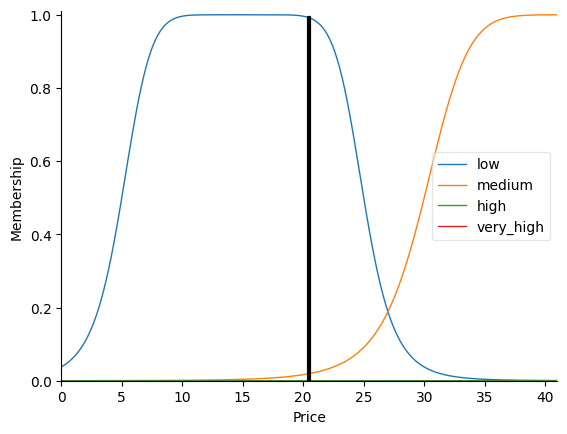

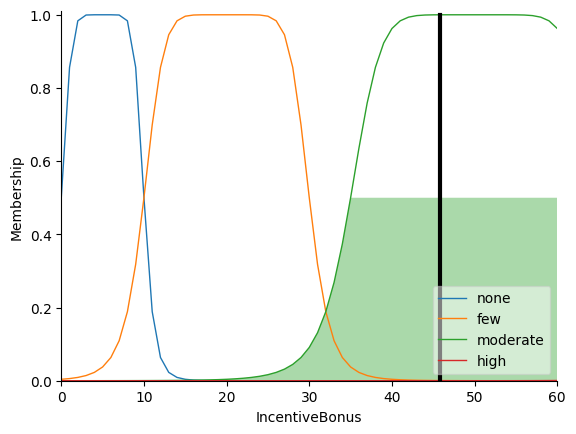

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


TrafficCond = ctrl.Antecedent(np.arange(0,101,1),'TrafficCond')
RideDist = ctrl.Antecedent(np.arange(0,51,1),'RideDist')
WeatherCond = ctrl.Antecedent(np.arange(0,3,1),'WeatherCond')
CustomerRating = ctrl.Antecedent(np.arange(0,5.1,0.1),'CustomerRating')
DemandLvl = ctrl.Antecedent(np.arange(0,101,1),'DemandLvl')
RidePunctuality = ctrl.Antecedent(np.arange(0,101,1),'RidePunctuality')

Price = ctrl.Consequent(np.arange(0,41.1,0.1),'Price')
IncentiveBonus = ctrl.Consequent(np.arange(0,61,1),'IncentiveBonus')

RidePunctuality['late'] = fuzz.gbellmf(RidePunctuality.universe, 10, 4, 25)
RidePunctuality['on_time'] = fuzz.gbellmf(RidePunctuality.universe, 10, 4, 60)
RidePunctuality['early'] = fuzz.gbellmf(RidePunctuality.universe, 10, 4, 85)

TrafficCond['low'] = fuzz.gbellmf(TrafficCond.universe, 10, 4, 15)
TrafficCond['medium'] = fuzz.gbellmf(TrafficCond.universe, 10, 4, 45)
TrafficCond['high'] = fuzz.gbellmf(TrafficCond.universe, 10, 4, 80)

RideDist['short'] = fuzz.gbellmf(RideDist.universe, 1.5, 4, 1.5)
RideDist['medium'] = fuzz.gbellmf(RideDist.universe, 2.5, 4, 5)
RideDist['long'] = fuzz.gbellmf(RideDist.universe, 5, 4, 13)
RideDist['very_long'] = fuzz.gbellmf(RideDist.universe, 10, 4, 32.5)

WeatherCond['good'] = fuzz.gbellmf(WeatherCond.universe, 0.3, 4, 0)
WeatherCond['moderate'] = fuzz.gbellmf(WeatherCond.universe, 0.3, 4, 1)
WeatherCond['bad'] = fuzz.gbellmf(WeatherCond.universe, 0.3, 4, 2)

CustomerRating['poor'] = fuzz.gbellmf(CustomerRating.universe, 0.3, 4, 1.75)
CustomerRating['avg'] = fuzz.gbellmf(CustomerRating.universe, 0.5, 4, 3)
CustomerRating['good'] = fuzz.gbellmf(CustomerRating.universe, 0.3, 4, 4.5)

DemandLvl['low'] = fuzz.gbellmf(DemandLvl.universe, 10, 4, 15)
DemandLvl['medium'] = fuzz.gbellmf(DemandLvl.universe, 15, 4, 45)
DemandLvl['high'] = fuzz.gbellmf(DemandLvl.universe, 10, 4, 85)

Price['low'] = fuzz.gbellmf(Price.universe, 10, 4, 15)
Price['medium'] = fuzz.gbellmf(Price.universe, 15, 4, 45)
Price['high'] = fuzz.gbellmf(Price.universe, 10, 4, 75)
Price['very_high'] = fuzz.gbellmf(Price.universe, 7, 4, 90)

IncentiveBonus['none'] = fuzz.gbellmf(IncentiveBonus.universe, 5, 4, 5)
IncentiveBonus['few'] = fuzz.gbellmf(IncentiveBonus.universe, 10, 4, 20)
IncentiveBonus['moderate'] = fuzz.gbellmf(IncentiveBonus.universe, 15, 4, 50)
IncentiveBonus['high'] = fuzz.gbellmf(IncentiveBonus.universe, 10, 4, 85)


rules = [
    # Giá
    ctrl.Rule(RideDist['short'] & TrafficCond['low'] & DemandLvl['low'], Price['low']),
    ctrl.Rule(RideDist['short'] & TrafficCond['medium'] & DemandLvl['high'], Price['medium']),
    ctrl.Rule(RideDist['medium'] & TrafficCond['high'] & DemandLvl['high'], Price['high']),
    ctrl.Rule(RideDist['long'] & TrafficCond['medium'] & WeatherCond['good'], Price['medium']),
    ctrl.Rule(RideDist['long'] & TrafficCond['high'] & WeatherCond['bad'], Price['very_high']),
    ctrl.Rule(RideDist['very_long'] & TrafficCond['high'] & DemandLvl['high'], Price['very_high']),
    ctrl.Rule(RideDist['medium'] & TrafficCond['low'] & DemandLvl['low'], Price['medium']),
    ctrl.Rule(RideDist['short'] & TrafficCond['high'] & WeatherCond['bad'], Price['high']),
    ctrl.Rule(RideDist['very_long'] & WeatherCond['bad'], Price['very_high']),
    ctrl.Rule(RideDist['medium'] & TrafficCond['medium'] & WeatherCond['moderate'], Price['medium']),

    # Điểm thưởng
    ctrl.Rule(CustomerRating['good'] & RidePunctuality['early'], IncentiveBonus['high']),
    ctrl.Rule(CustomerRating['avg'] & RidePunctuality['on_time'], IncentiveBonus['moderate']),
    ctrl.Rule(CustomerRating['poor'] & RidePunctuality['late'], IncentiveBonus['none']),
    ctrl.Rule(RideDist['long'] & TrafficCond['high'] & RidePunctuality['on_time'], IncentiveBonus['high']),
    ctrl.Rule(RideDist['medium'] & TrafficCond['medium'] & CustomerRating['good'], IncentiveBonus['moderate']),
    ctrl.Rule(CustomerRating['poor'] & RidePunctuality['late'], IncentiveBonus['none']),
    ctrl.Rule(RideDist['very_long'] & WeatherCond['bad'] & CustomerRating['good'], IncentiveBonus['high']),
    ctrl.Rule(RideDist['short'] & CustomerRating['avg'] & RidePunctuality['on_time'], IncentiveBonus['few']),
    ctrl.Rule(RideDist['long'] & TrafficCond['high'] & RidePunctuality['late'], IncentiveBonus['few']),
    ctrl.Rule(RideDist['medium'] & WeatherCond['moderate'] & CustomerRating['good'], IncentiveBonus['moderate']),
]

control_system = ctrl.ControlSystem(rules)
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['TrafficCond'] = 60
fuzzy_system.input['WeatherCond'] = 2
fuzzy_system.input['RideDist'] = 10
fuzzy_system.input['CustomerRating'] = 3.5
fuzzy_system.input['DemandLvl'] = 80
fuzzy_system.input['RidePunctuality'] = 55

fuzzy_system.compute()

print('Giá dự kiến:',fuzzy_system.output['Price']*1000)
print('Điểm thưởng:',fuzzy_system.output['IncentiveBonus'])
Price.view(sim=fuzzy_system)
IncentiveBonus.view(sim=fuzzy_system)